# GRIP : The Sparks Fundation
Name : Ravindranath Raghunath Kumbhar

# Task 3 : Exploratory Data Analysis - Retail
As a business manager, try to find out the weak areas where you can 
work to make more profit. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Data set

df = pd.read_csv("C:\Practice_dataset\SampleSuperstore.csv")

In [3]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<Figure size 864x864 with 0 Axes>

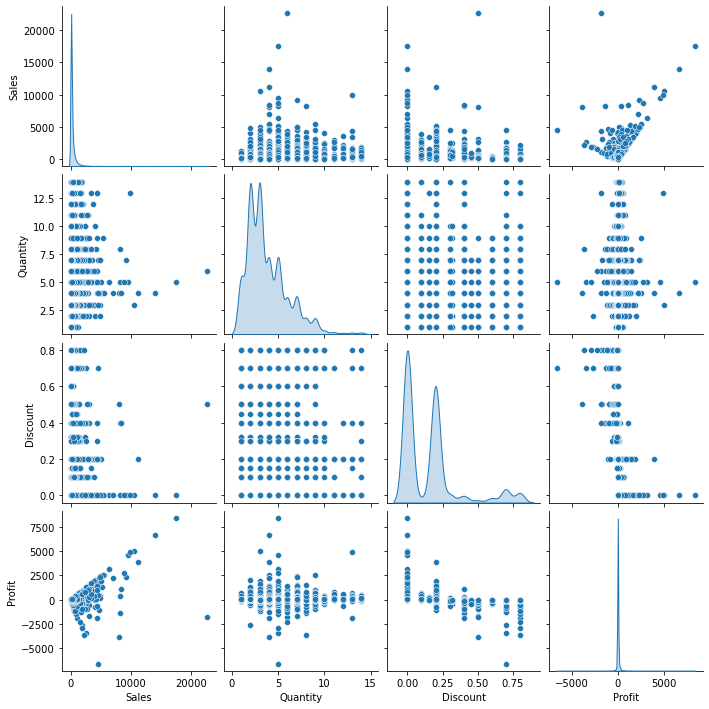

In [9]:
plt.figure(figsize=(12,12))
sns.pairplot(df.drop(columns="Postal Code"), diag_kind="kde")
plt.show()

# Profit data

In [35]:
profit_data = pd.DataFrame(df.groupby(["Category", "Sub-Category"]).sum()["Profit"])

In [36]:
profit_data.sort_values(["Category", "Sub-Category", "Profit"],ascending=False)

Profit
Category        Sub-Category            
Technology      Phones        44515.7306
                Machines       3384.7569
                Copiers       55617.8249
                Accessories   41936.6357
Office Supplies Supplies      -1189.0995
                Storage       21278.8264
                Paper         34053.5693
                Labels         5546.2540
                Fasteners       949.5182
                Envelopes      6964.1767
                Binders       30221.7633
                Art            6527.7870
                Appliances    18138.0054
Furniture       Tables       -17725.4811
                Furnishings   13059.1436
                Chairs        26590.1663
                Bookcases     -3472.5560

# Less Profit

In [37]:
loss = df[df["Profit"]<0]

In [39]:
loss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


In [40]:
loss.shape

(1871, 13)

In [41]:
Total_loss = np.negative(loss['Profit'].sum())

In [42]:
Total_loss

156131.2857

In [44]:
# loss by Sub category

loss.groupby('Sub-Category').sum().sort_values('Profit', ascending = True)
     

,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Binders,32609300,36140.6130,2456,452.40,-38510.4964
Tables,10224004,104978.5460,757,74.15,-32412.1483
Machines,2236261,72456.2530,157,25.60,-30118.6682
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Appliances,4825871,3382.5340,235,53.60,-8629.6412
Phones,6105294,35797.8400,476,46.60,-7530.6235
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Storage,8606475,37869.0720,569,32.20,-6426.3038


# 
From the above table we can see that more loss in Binders,Tables and Machines as compared to other categories.

In [48]:
# Low Sales states

df.groupby(["State"]).sum()["Sales"].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

# 
Above Data is the Top 10 states where sales are very Low

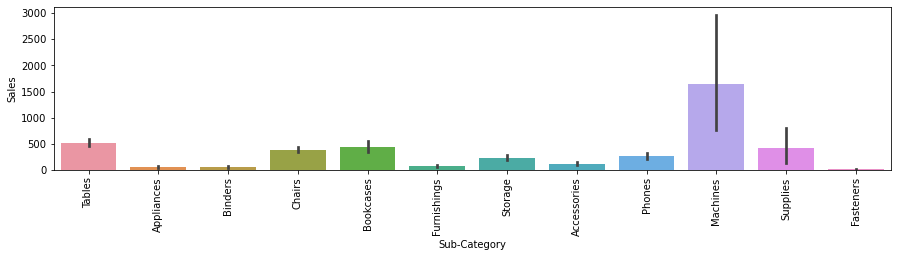

In [54]:
# Loss sub category

plt.figure(figsize = (15,3))
sns.barplot(data = loss, x = 'Sub-Category', y = 'Sales')
plt.xticks(rotation = 90)
plt.xlabel('Sub-Category')
plt.ylabel("Sales")
plt.show()

# 
Here the sales for Binders, Fasteners,Appliances are very low

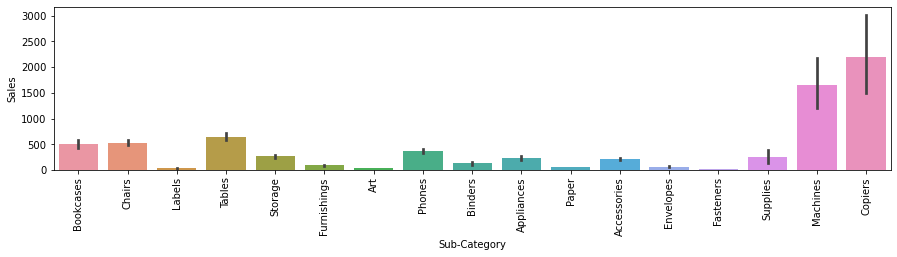

In [22]:
#Sub_category graph for overall market data
plt.figure(figsize = (15,3))
sns.barplot(data = df, x = 'Sub-Category', y = 'Sales')
plt.xticks(rotation = 90)
plt.xlabel('Sub-Category')
plt.ylabel("Sales")
plt.show()

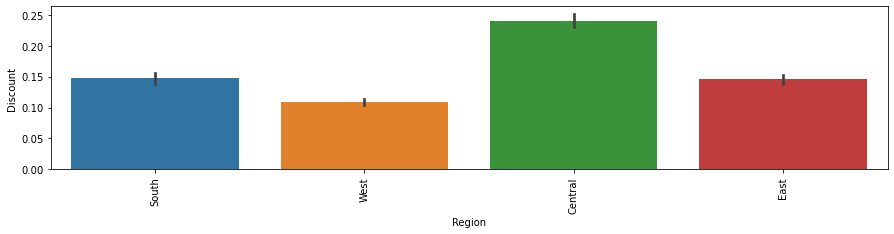

As compared to others in the central region discount is high


In [65]:
plt.figure(figsize = (15,3))
sns.barplot(data = df, x = 'Region', y = 'Discount')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel("Discount")
plt.show()

print("As compared to others in the central region discount is high")

In [10]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
category= df["Category"].value_counts()

<AxesSubplot:>

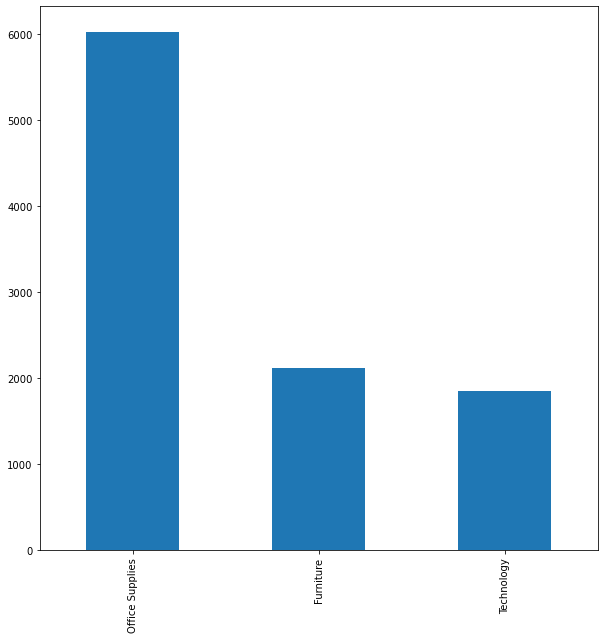

In [12]:
plt.figure(figsize=(10,10))
category.plot.bar()


In [13]:
sub_category = df["Sub-Category"].value_counts()

<AxesSubplot:ylabel='Sub-Category'>

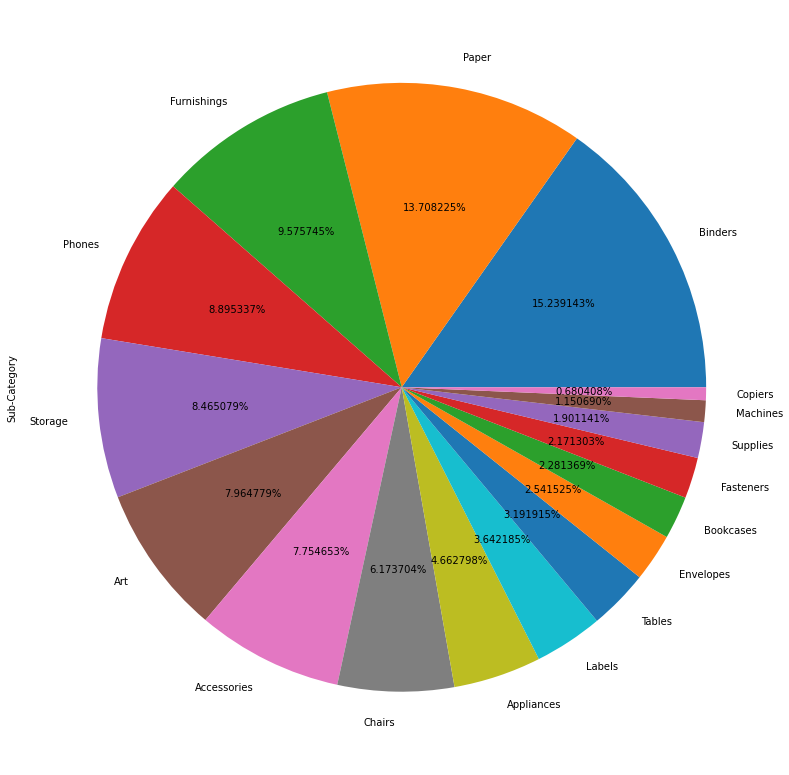

In [14]:
plt.figure(figsize=(14,14))
sub_category.plot.pie(autopct ="%2f%%")

In [15]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
region = df["Region"].value_counts()

<AxesSubplot:ylabel='Region'>

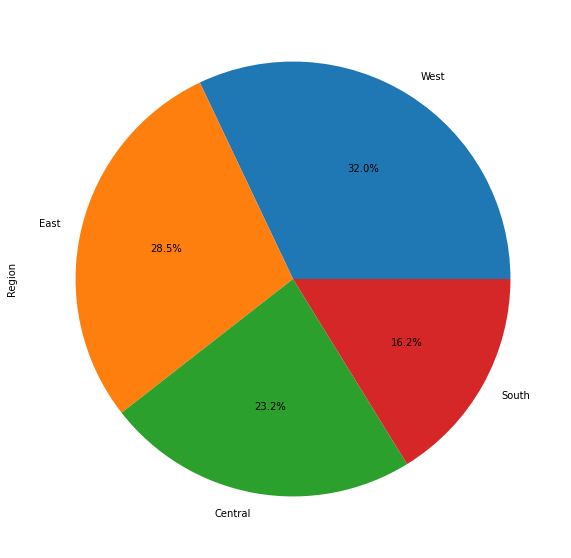

In [17]:
plt.figure(figsize=(15,10))
region.plot.pie(autopct ="%1.1f%%" )

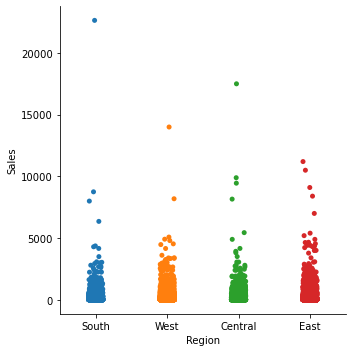

In [18]:
sns.catplot(x="Region", y = "Sales", data=df)

# Segment Count

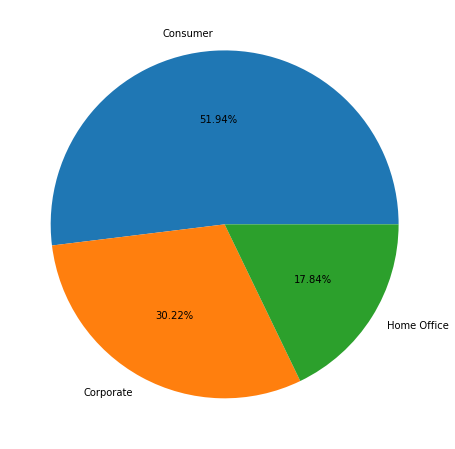

In [55]:
plt.figure(figsize = (10,8))
plt.pie(df['Segment'].value_counts(), labels = df['Segment'].value_counts().keys(), autopct = '%.2f%%')
plt.show()

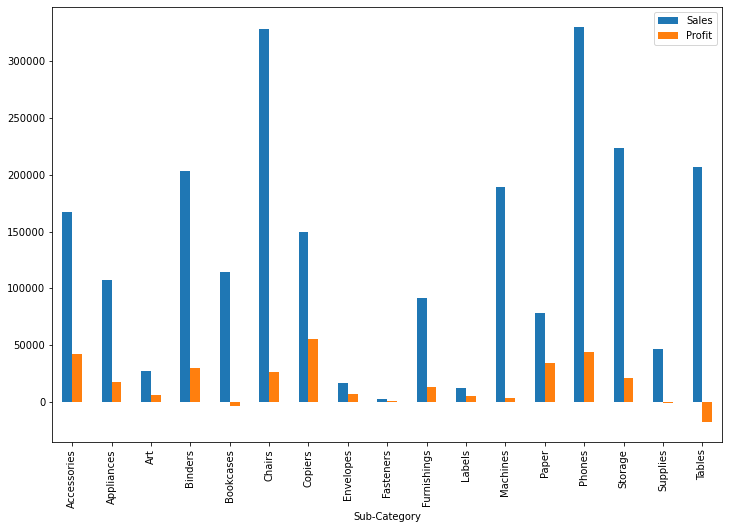

In [57]:
#Analyze sales and profit by Sub category
values = df.groupby('Sub-Category').sum()[['Sales', 'Profit']]
values.plot(kind = 'bar', figsize=(12,8))
plt.show()

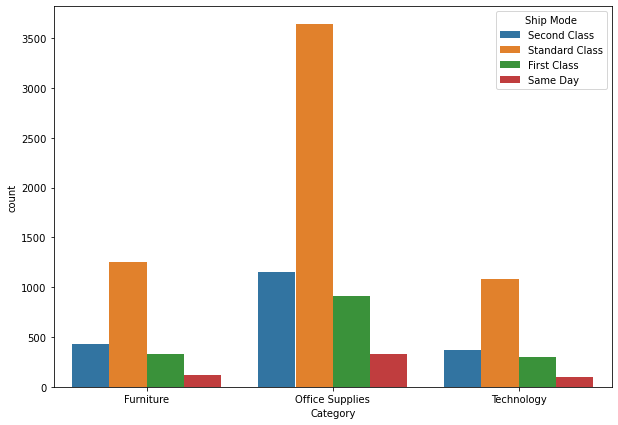

In [60]:
plt.figure(figsize = (10,7))
sns.countplot(x = df['Category'], hue = df['Ship Mode'])
plt.show()
     

# State Wise

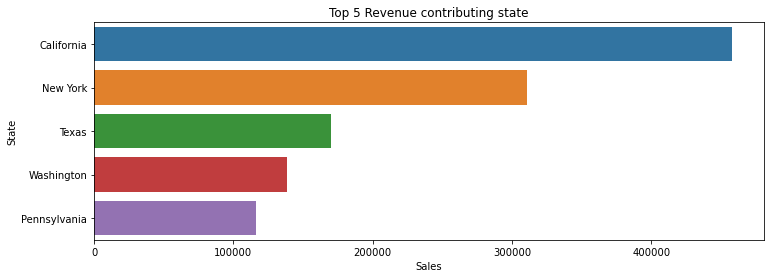

from the above graph we can see that California and New York have a highest Sales


In [64]:
tot_sales_state = (df.groupby('State').Sales.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_state.head(),y=tot_sales_state.head().index)
plt.title('Top 5 Revenue contributing state')
plt.show()

print("from the above graph we can see that California and New York have a highest Sales")

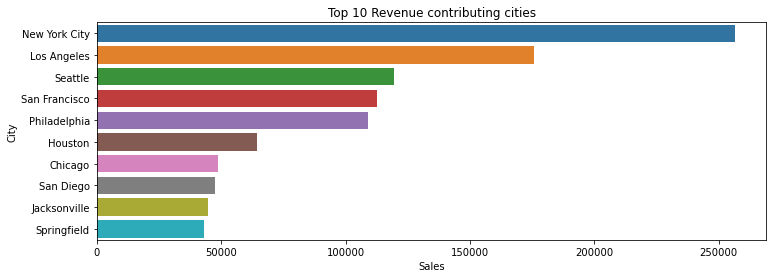

In [61]:
tot_sales_city = (df.groupby('City').Sales.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_city.head(10),y=tot_sales_city.head(10).index)
plt.title('Top 10 Revenue contributing cities')
plt.show()

# Hence EDA helps us to understand the sales inforamation